In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
tips = sns.load_dataset("tips")
fluege = sns.load_dataset("flights")

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


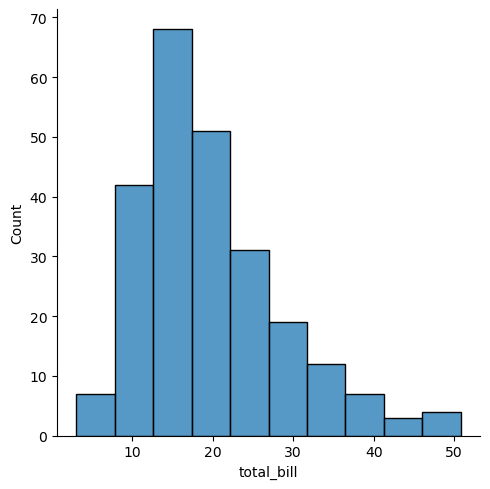

In [11]:
sns.displot(tips["total_bill"], kde=False, bins=10)

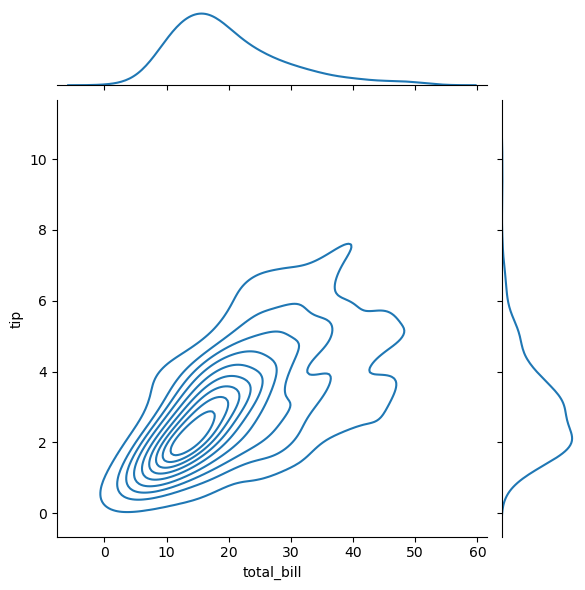

In [19]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="kde")

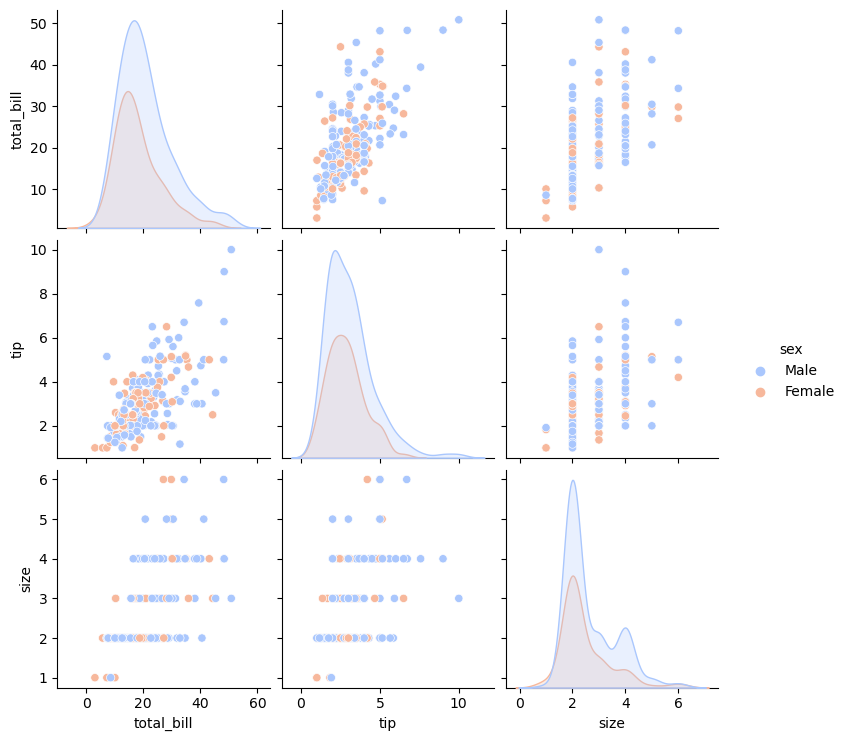

In [23]:
sns.pairplot(tips, hue="sex", palette="coolwarm")

<AxesSubplot:xlabel='total_bill'>

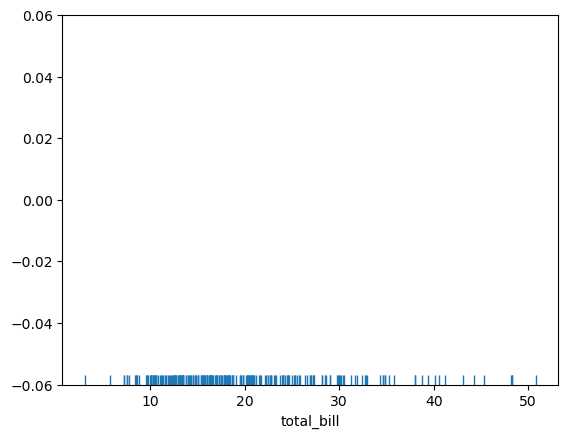

In [24]:
sns.rugplot(tips["total_bill"])

(0.0, 1.0)

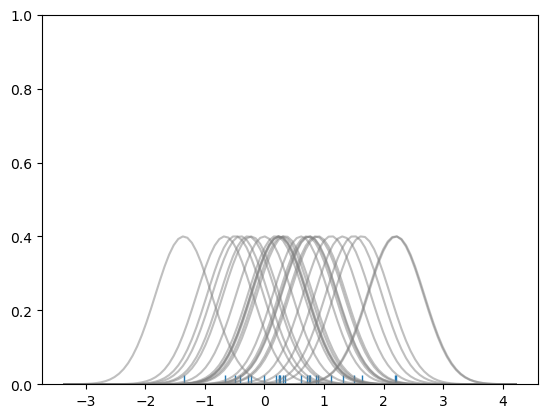

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Datensatz erstellen
dataset = np.random.randn(25)

# Ein weiteres rugplot erstellen
sns.rugplot(dataset);

# Die x-Achse des Plot einstellen
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 gleich verteilte Punkte von x_min bis x_max
x_axis = np.linspace(x_min,x_max,100)

# Die Bandbreite (en.: bandwidth) einstellen. Mehr Infos zur Bandbreite:
url = 'https://de.wikipedia.org/wiki/Kerndichtesch%C3%A4tzer#Satz_von_Nadaraya'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Eine leere Liste erstellen
kernel_list = []

# Jede Funktion visualisieren
for data_point in dataset:
    
    # Für jeden Punkt wird ein Kernel erstellt und der Liste angefügt
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # Skalieren für die Darstellung
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Summe der Basisfunktionen')

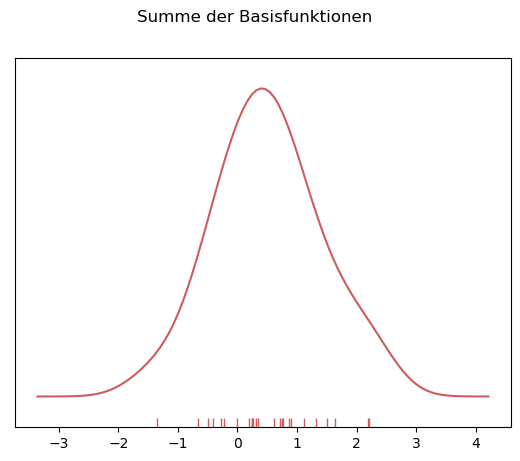

In [26]:
# Um das KDE-Plot zu erhalten können wir diese Funktionen summieren.

# Zeiche die Summe der Basisfunktionen
sum_of_kde = np.sum(kernel_list,axis=0)

# Diagramm zeigen
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Das erste rugplot hinzufügen
sns.rugplot(dataset,c = 'indianred')

# Die y-tick-Markierungen entfernen
plt.yticks([])

# Titel definieren
plt.suptitle("Summe der Basisfunktionen")

<AxesSubplot:xlabel='tip', ylabel='Density'>

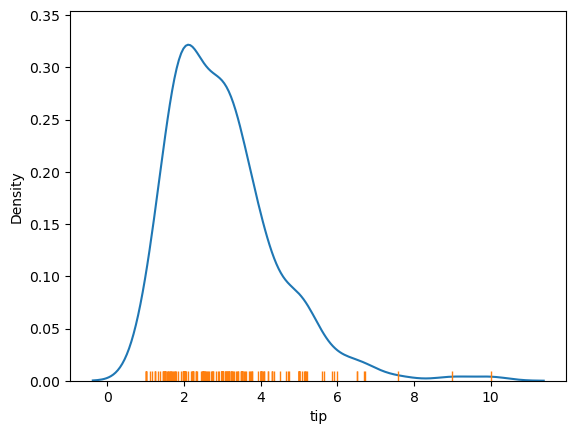

In [30]:
sns.kdeplot(tips["tip"])
sns.rugplot(tips["tip"])

In [31]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='sex', ylabel='total_bill'>

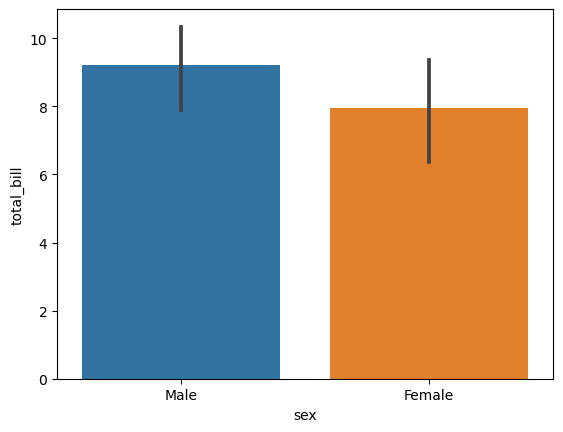

In [34]:
sns.barplot(x="sex",y="total_bill", data=tips, estimator=np.std)

<AxesSubplot:xlabel='sex', ylabel='count'>

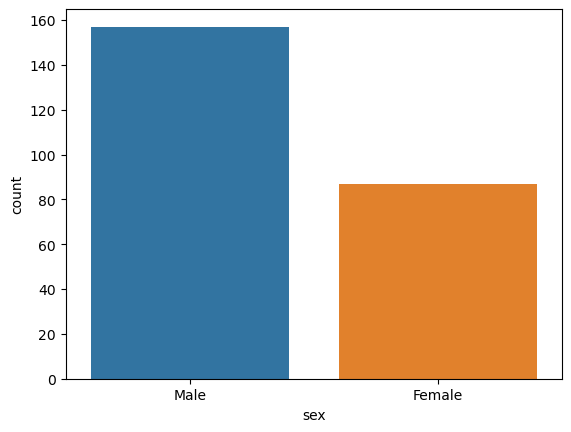

In [36]:
sns.countplot(x="sex",data=tips)

<AxesSubplot:>

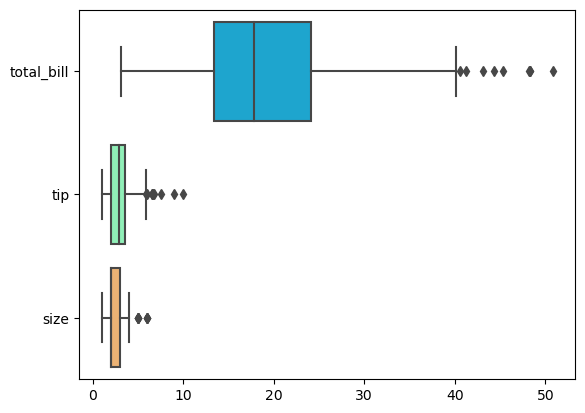

In [38]:
sns.boxplot(data=tips, palette="rainbow", orient="h")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

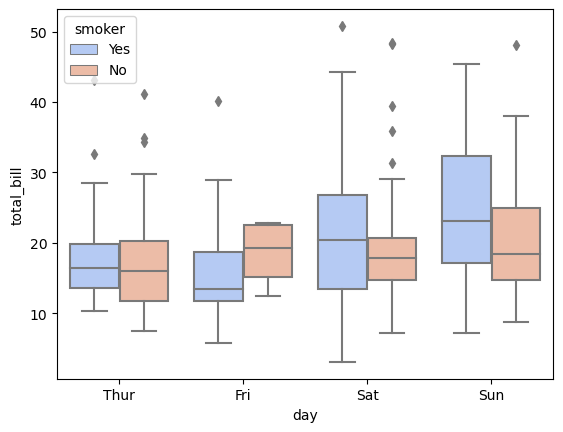

In [42]:
sns.boxplot(x="day", y="total_bill",hue="smoker", data=tips, palette="coolwarm")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

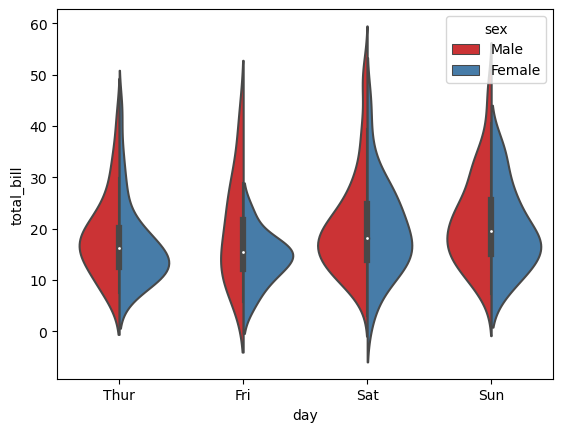

In [45]:
sns.violinplot(x="day", y="total_bill", split=True ,data=tips, hue="sex" ,palette="Set1")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

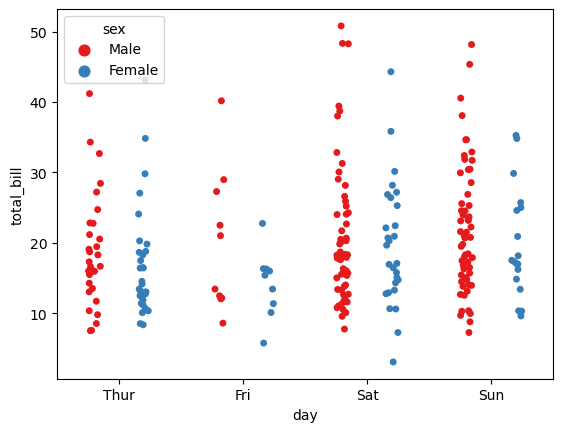

In [50]:
sns.stripplot(x="day", y="total_bill", data=tips, hue="sex", palette="Set1", dodge=True ,jitter=True)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

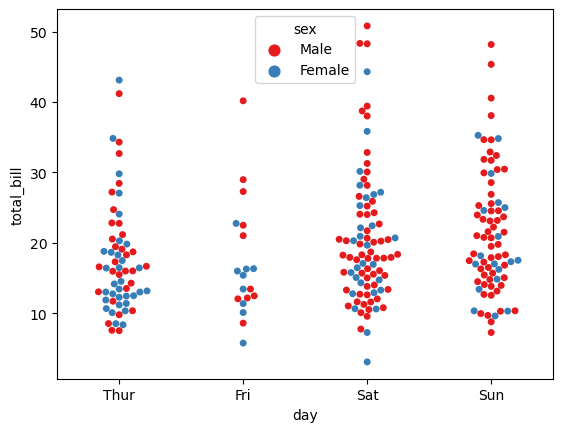

In [53]:
sns.swarmplot(x="day", y="total_bill", hue="sex", palette="Set1" ,data=tips)

<AxesSubplot:xlabel='tip', ylabel='day'>

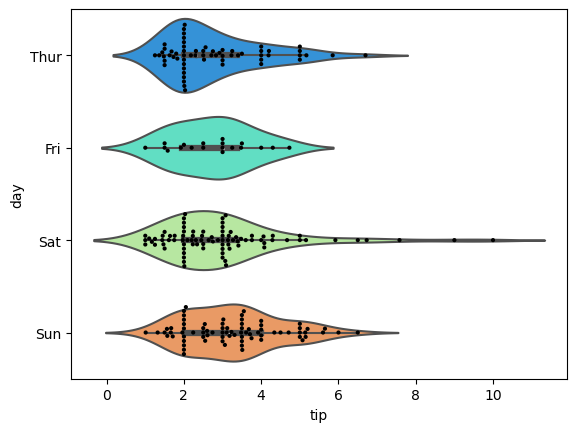

In [54]:
sns.violinplot(x="tip", y="day", data=tips, palette="rainbow")
sns.swarmplot(x="tip", y="day", data=tips, color="black", size=3)

C:\Users\Oliver\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


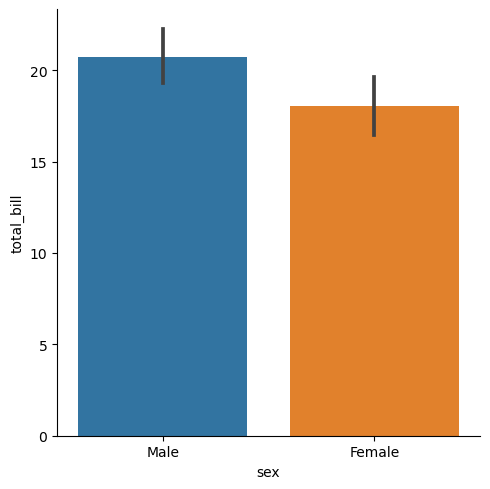

In [55]:
sns.factorplot(x="sex", y="total_bill", data=tips, kind="bar")

In [4]:
fluege = sns.load_dataset("flights")

In [6]:
fluege.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [7]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

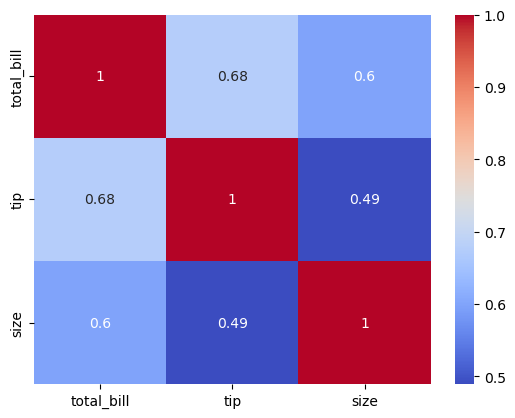

In [12]:
sns.heatmap(tips.corr(), cmap="coolwarm", annot=True)

In [13]:
fluege.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<AxesSubplot:xlabel='year', ylabel='month'>

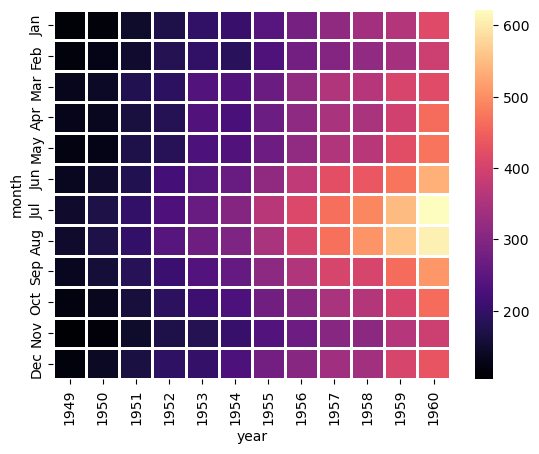

In [20]:
pv_fluege = fluege.pivot_table(values="passengers", index="month",columns="year")
sns.heatmap(pv_fluege, cmap="magma", linecolor="white", linewidth=1)

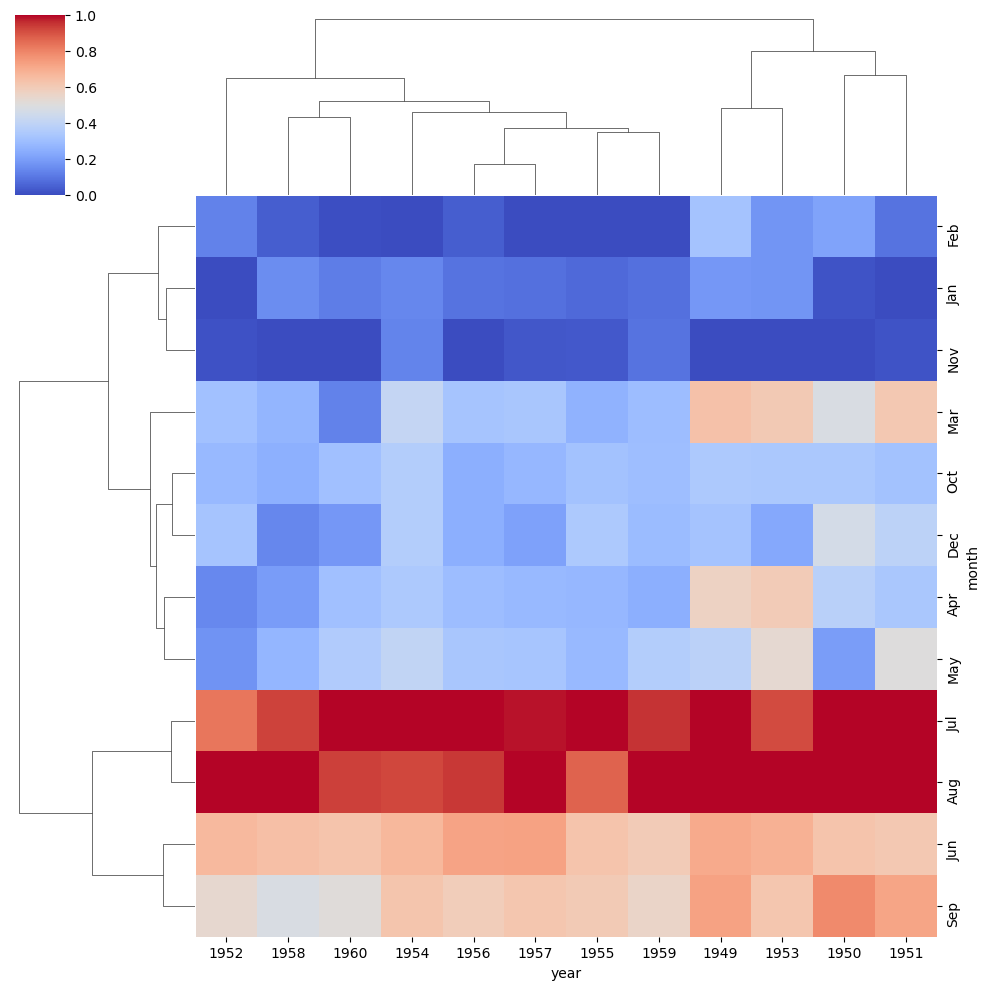

In [23]:
sns.clustermap(pv_fluege, cmap="coolwarm", standard_scale=1)

In [24]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


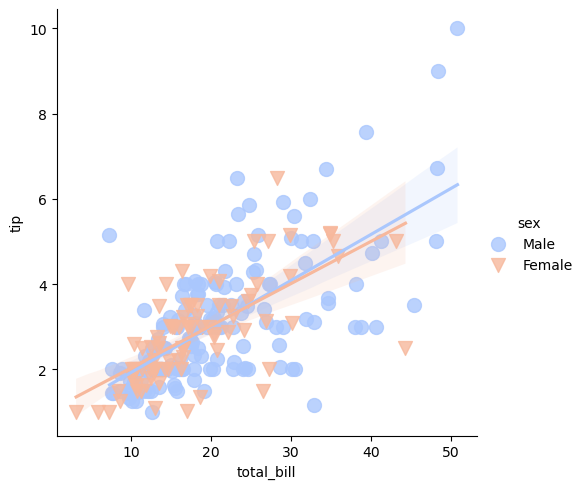

In [32]:
sns.lmplot(x="total_bill", y="tip", data=tips, hue="sex", palette="coolwarm", markers=["o","v"], scatter_kws={"s":100})

C:\Users\Oliver\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


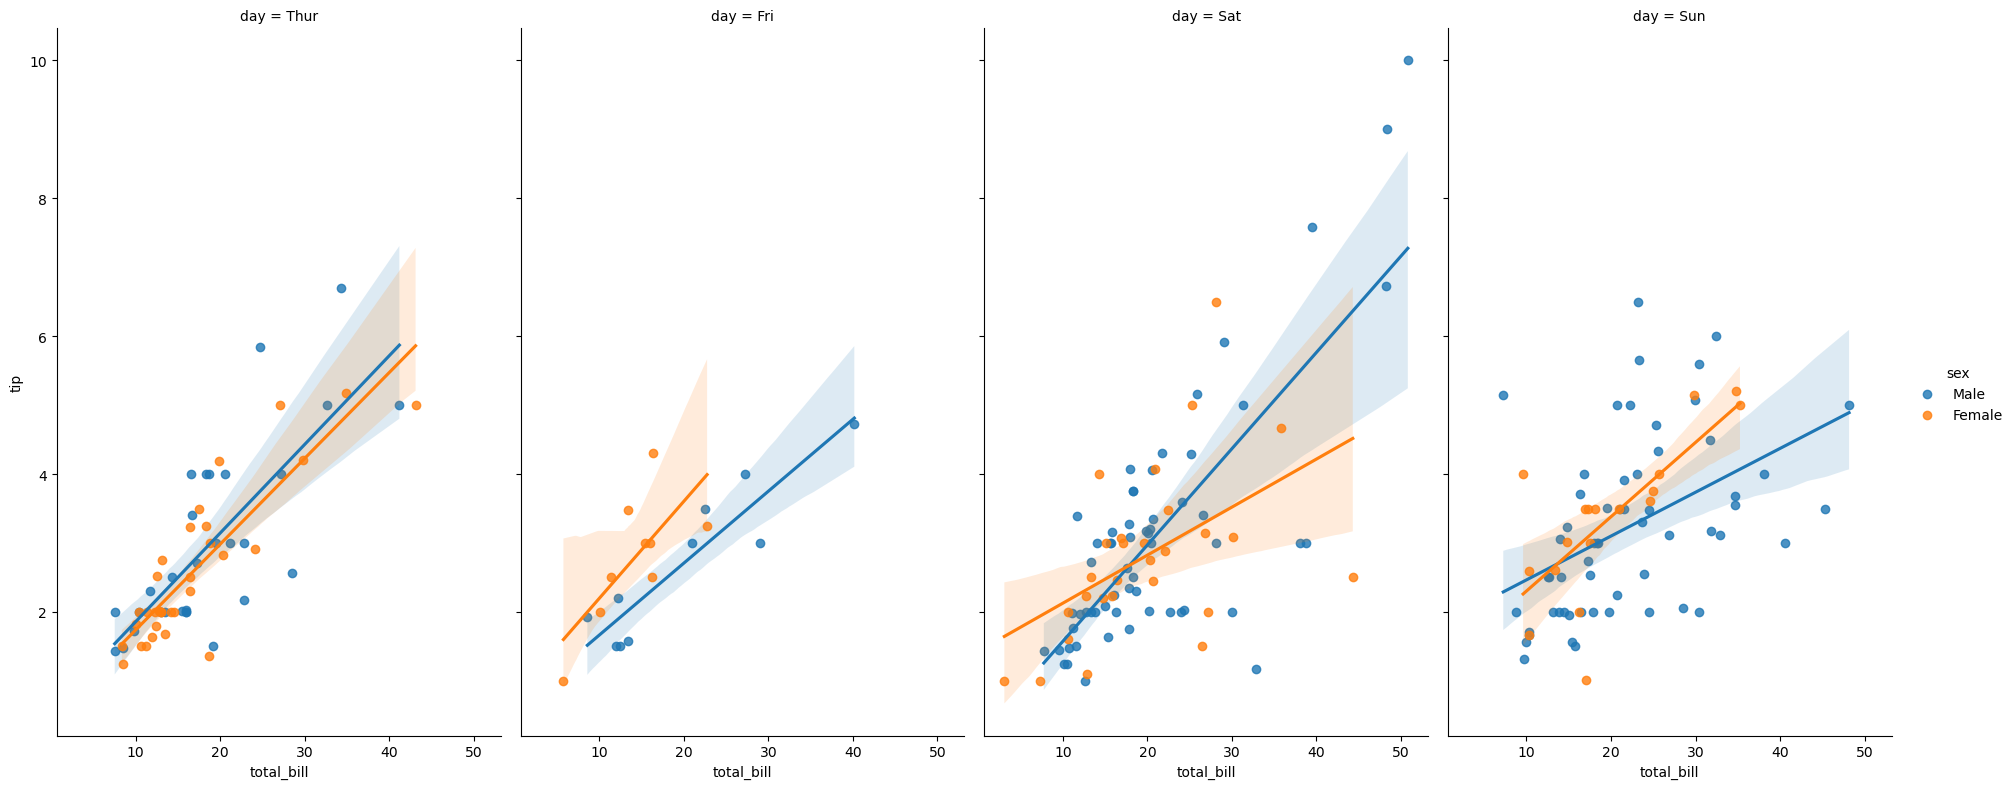

In [39]:
sns.lmplot(x="total_bill",y="tip", data=tips, col="day", hue="sex",aspect=0.6, size=8)

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


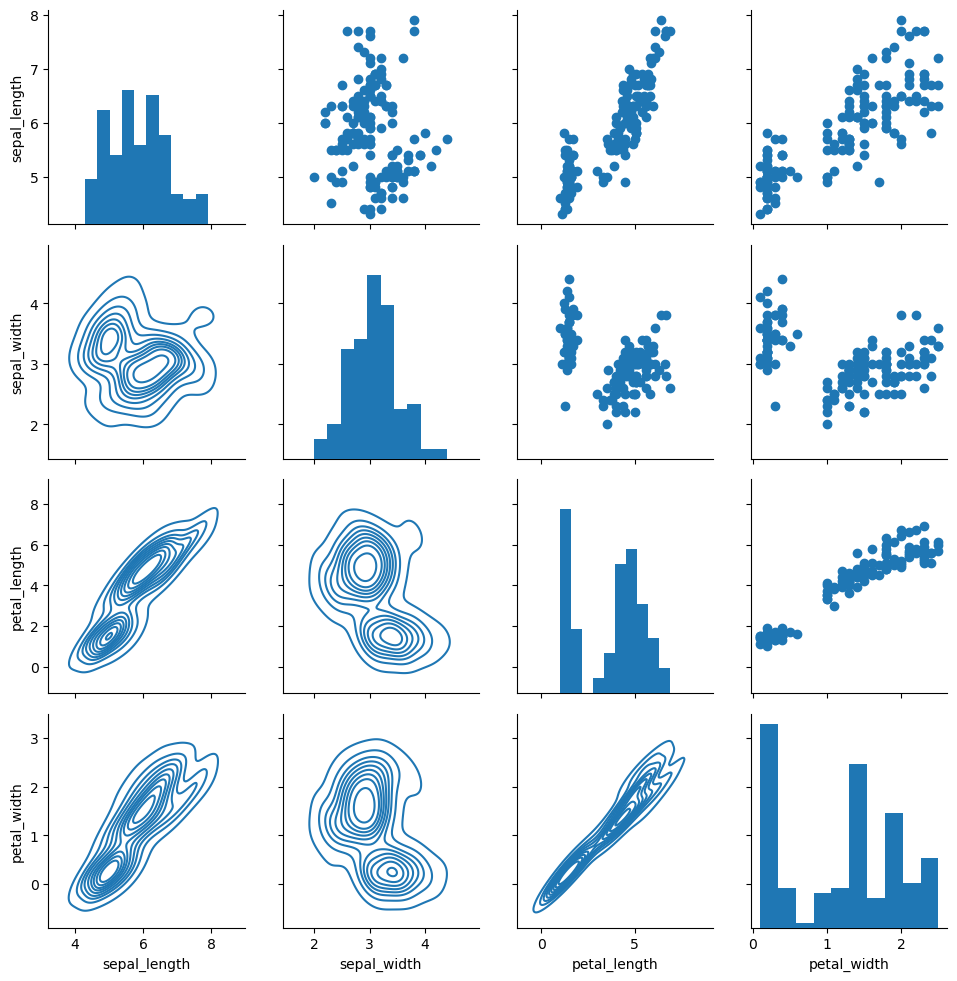

In [12]:
grid = sns.PairGrid(iris)
grid.map_diag(plt.hist)
grid.map_upper(plt.scatter)
grid.map_lower(sns.kdeplot)

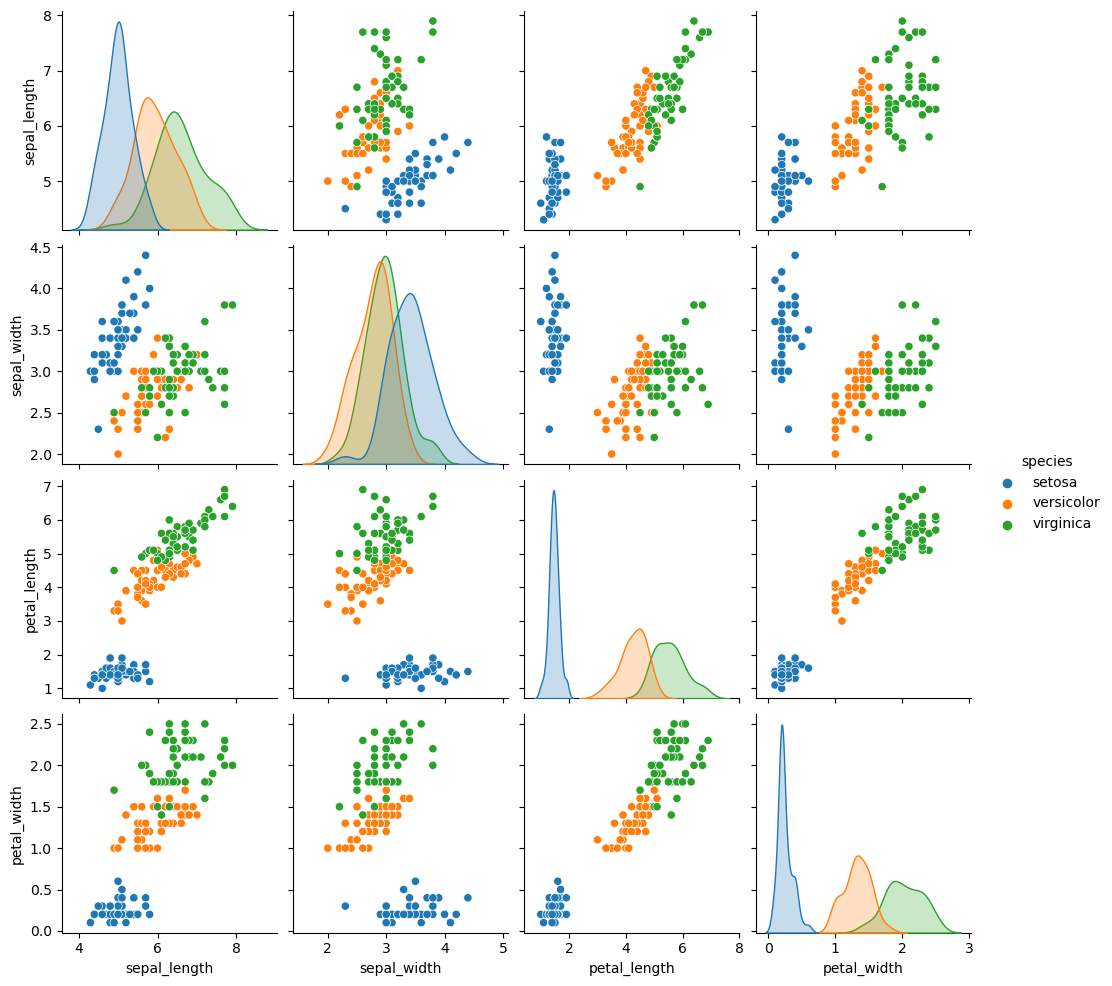

In [14]:
sns.pairplot(iris, hue="species")

In [15]:
tips = sns.load_dataset("tips")

In [16]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


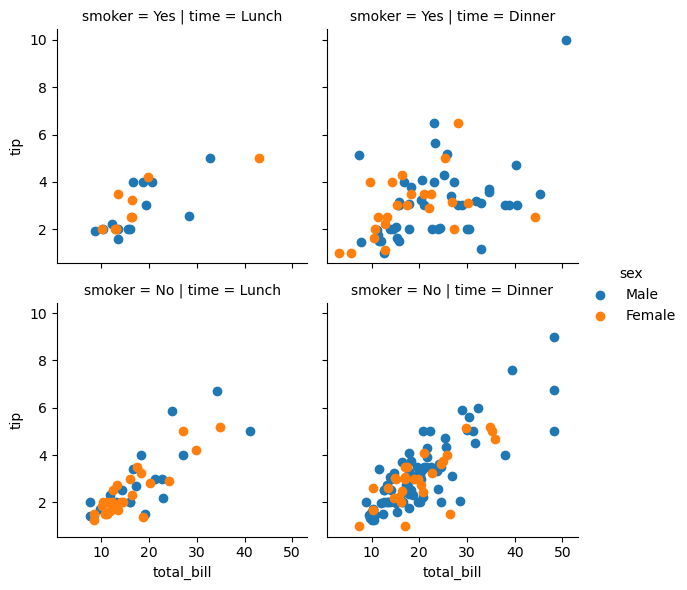

In [20]:
grid = sns.FacetGrid(tips, col="time", row="smoker", hue="sex")
grid.map(plt.scatter, "total_bill", "tip").add_legend()

C:\Users\Oliver\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Oliver\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Oliver\anaconda3\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


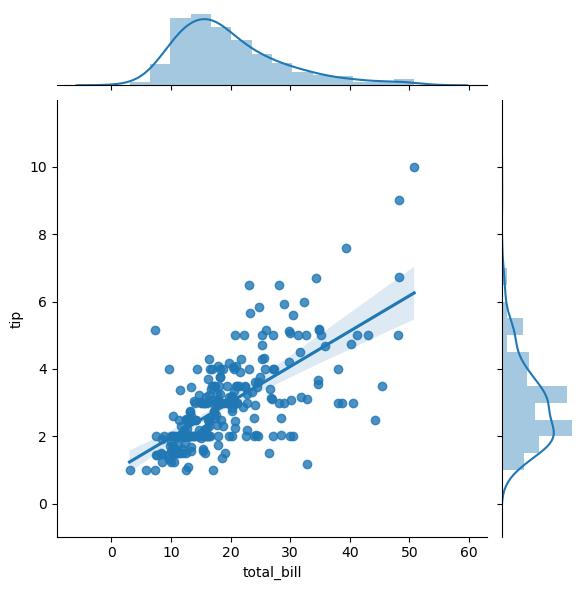

In [23]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g.plot(sns.regplot, sns.distplot)

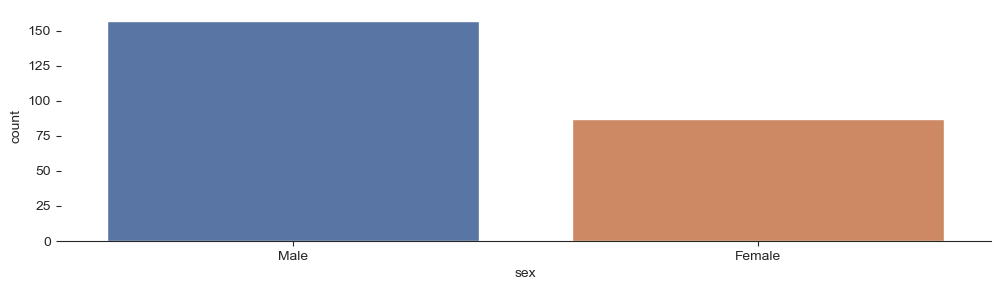

In [32]:
plt.figure(figsize=(12,3))

sns.set_style("ticks")
sns.countplot(x="sex", data=tips, palette="deep")
sns.despine(left=True)

C:\Users\Oliver\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


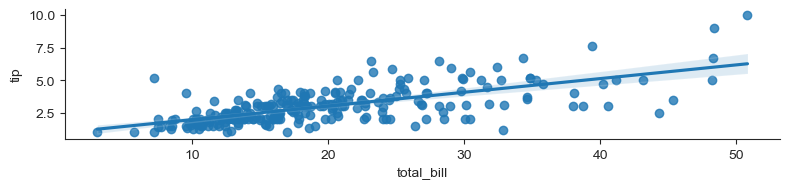

In [34]:
sns.lmplot(x="total_bill", y="tip", size=2, aspect=4, data=tips)

<AxesSubplot:xlabel='sex', ylabel='count'>

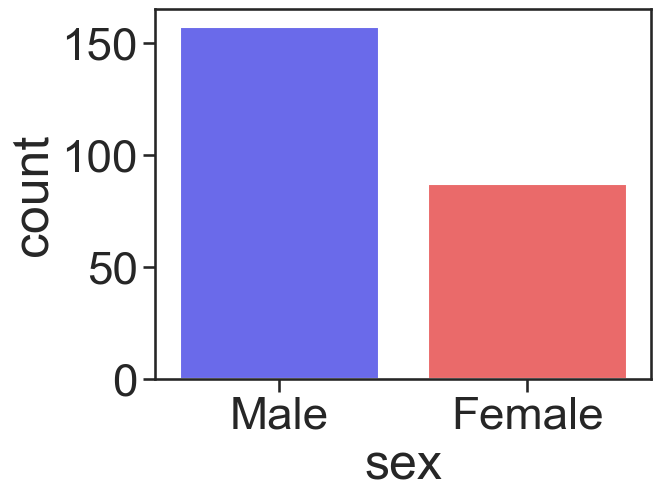

In [38]:
sns.set_context("talk", font_scale=2)
sns.countplot(x="sex", data=tips, palette="seismic")